TALLER PCA - Analisis de factores
Andres Useche
Rafael Torregroza

In [1]:
install.packages(c("corrplot","psych","FactoMineR","factoextra","reshape2","RColorBrewer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘mnormt’, ‘GPArotation’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘plyr’




In [4]:
install.packages("readxl")
library(readxl)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




##Data understanding & preparation

Primero importemos la base de datos

In [24]:
df <- read_excel("/content/HATCO_data.xlsx")

In [25]:
head(df)

ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,1,43,4.3,0,1,0,1
3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,1,48,5.2,0,1,1,2
4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,1,32,3.9,0,1,1,1
5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
6,1.9,3.3,7.9,4.8,2.6,1.9,9.7,1,45,4.4,0,1,1,2


In [7]:
str(df)

tibble [100 × 15] (S3: tbl_df/tbl/data.frame)
 $ ID : num [1:100] 1 2 3 4 5 6 7 8 9 10 ...
 $ X1 : num [1:100] 4.1 1.8 3.4 2.7 6 1.9 4.6 1.3 5.5 4 ...
 $ X2 : num [1:100] 0.6 3 5.2 1 0.9 3.3 2.4 4.2 1.6 3.5 ...
 $ X3 : num [1:100] 6.9 6.3 5.7 7.1 9.6 7.9 9.5 6.2 9.4 6.5 ...
 $ X4 : num [1:100] 4.7 6.6 6 5.9 7.8 4.8 6.6 5.1 4.7 6 ...
 $ X5 : num [1:100] 2.4 2.5 4.3 1.8 3.4 2.6 3.5 2.8 3.5 3.7 ...
 $ X6 : num [1:100] 2.3 4 2.7 2.3 4.6 1.9 4.5 2.2 3 3.2 ...
 $ X7 : num [1:100] 5.2 8.4 8.2 7.8 4.5 9.7 7.6 6.9 7.6 8.7 ...
 $ X8 : num [1:100] 0 1 1 1 0 1 0 1 0 1 ...
 $ X9 : num [1:100] 32 43 48 32 58 45 46 44 63 54 ...
 $ X10: num [1:100] 4.2 4.3 5.2 3.9 6.8 4.4 5.8 4.3 5.4 5.4 ...
 $ X11: num [1:100] 1 0 0 0 1 0 1 0 1 0 ...
 $ X12: num [1:100] 0 1 1 1 0 1 0 1 0 1 ...
 $ X13: num [1:100] 1 0 1 1 1 1 1 0 1 0 ...
 $ X14: num [1:100] 1 1 2 1 3 2 1 2 3 2 ...


Las variables x8,x11,x12,x13,x14 son variables categoricas por lo tanto se eliminan del dataset, posteriormente cuando se necesiten para etiquetar se usa un dataset que las contengan

ID no se tiene encuenta

In [41]:
df1 <- df[, c("X1", "X2", "X3", "X4", "X5", "X6", "X7", "X9", "X10")]
df1 = as.data.frame(df1)


In [42]:
head(df1)

,X1,X2,X3,X4,X5,X6,X7,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,32,4.2
2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,43,4.3
3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,48,5.2
4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,32,3.9
5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,58,6.8
6,1.9,3.3,7.9,4.8,2.6,1.9,9.7,45,4.4


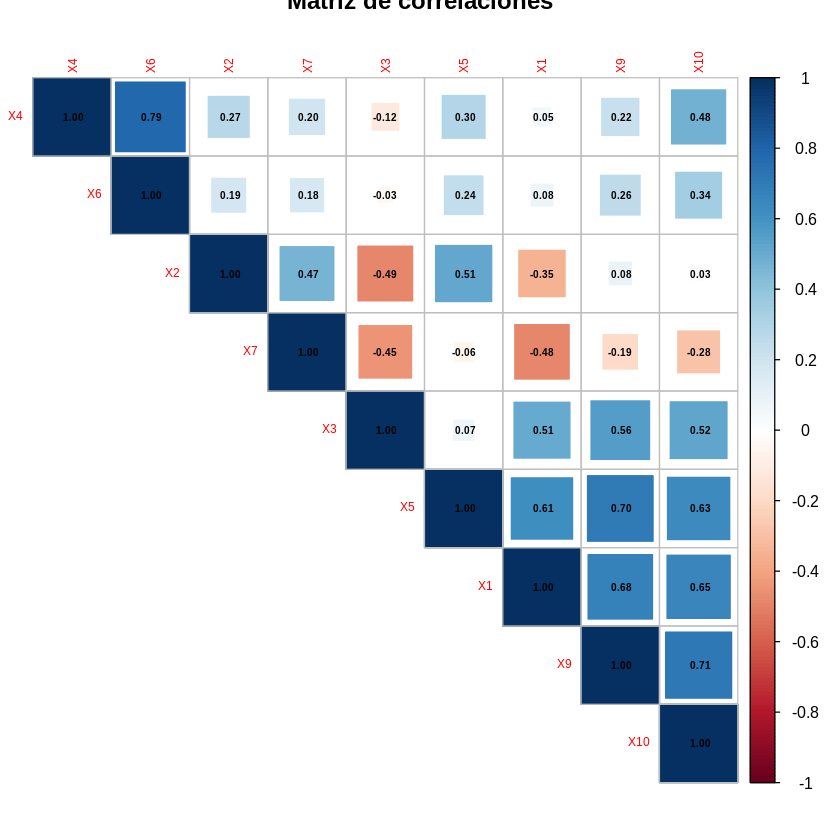

In [43]:
library("corrplot")
#creo matriz de correlaciones
base<-cor(df1)
#ejecuto el gráfico
corrplot(base, type="upper",method="square",title="Matriz de correlaciones", tl.cex=0.6,order="hclust", addCoef.col = "black", number.cex=0.5)

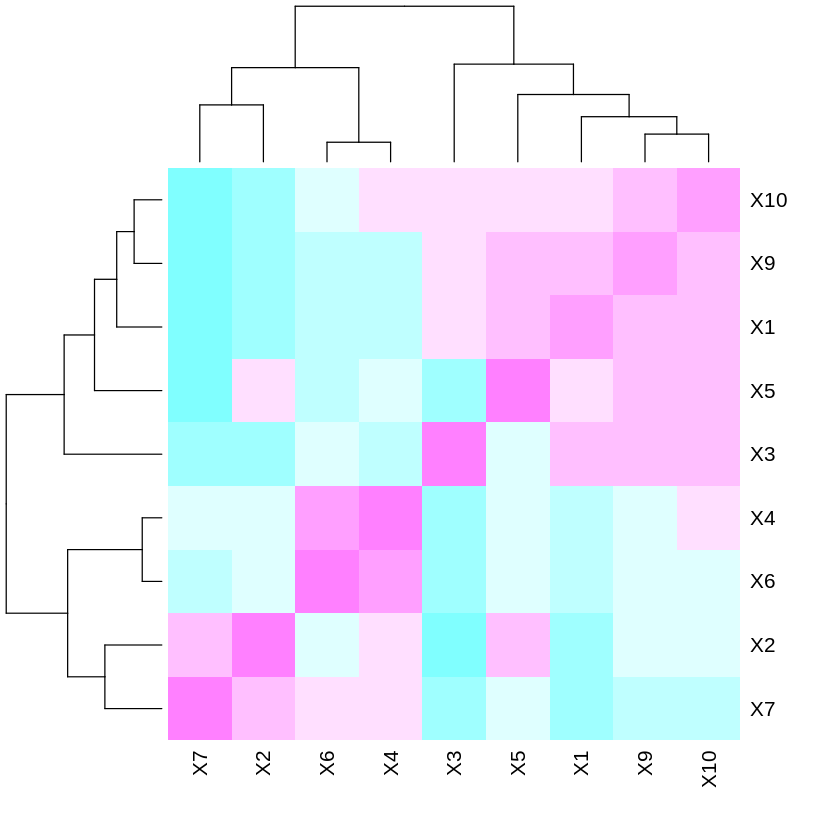

In [44]:
heatmap(base, col=cm.colors(8))

# Prueba de esfericidad de Bartlett

In [45]:
library("psych")
cortest.bartlett(base, n = nrow(df1))

$chisq
[1] 859.2559

$p.value
[1] 4.404956e-157

$df
[1] 36

#indice KMO

In [46]:
KMO(base)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = base)
Overall MSA =  0.57
MSA for each item = 
  X1   X2   X3   X4   X5   X6   X7   X9  X10 
0.50 0.34 0.63 0.50 0.47 0.60 0.88 0.83 0.73 

In [47]:
partial.r(df1)

,X1,X2,X3,X4,X5,X6,X7,X9,X10
X1,1.000000000,-0.95618371,-0.08343897,-0.2003069723,0.93940649,0.08953929,0.03613692,-0.0016912426,0.13762834
X2,-0.956183708,1.00000000,-0.13218316,-0.1650862262,0.94975244,0.07012352,0.15677447,-0.0336807794,0.09735654
X3,-0.083438974,-0.13218316,1.00000000,-0.3659139088,-0.08347738,0.10162786,-0.09908652,0.5540901248,0.53356637
X4,-0.200306972,-0.16508623,-0.36591391,1.0000000000,0.11198485,0.72987033,0.11864128,0.0002208197,0.59942682
X5,0.939406491,0.94975244,-0.08347738,0.1119848493,1.00000000,-0.06878437,-0.11279400,0.2175519377,0.04018280
X6,0.089539291,0.07012352,0.10162786,0.7298703264,-0.06878437,1.00000000,0.03063415,0.1336717860,-0.23131299
X7,0.036136922,0.15677447,-0.09908652,0.1186412790,-0.11279400,0.03063415,1.00000000,0.1609511090,-0.14563737
X9,-0.001691243,-0.03368078,0.55409012,0.0002208197,0.21755194,0.13367179,0.16095111,1.0000000000,-0.00917747
X10,0.137628338,0.09735654,0.53356637,0.5994268186,0.04018280,-0.23131299,-0.14563737,-0.0091774698,1.00000000


#Modeling

In [48]:
componentestotal<-prcomp(df1, center=TRUE, scale.=TRUE)
summary(componentestotal)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9046 1.5836 1.1059 0.79798 0.66604 0.55845 0.38760
Proportion of Variance 0.4031 0.2786 0.1359 0.07075 0.04929 0.03465 0.01669
Cumulative Proportion  0.4031 0.6817 0.8176 0.88835 0.93764 0.97229 0.98898
                           PC8     PC9
Standard deviation     0.30024 0.09504
Proportion of Variance 0.01002 0.00100
Cumulative Proportion  0.99900 1.00000

3 componenetes principales estraria bien, tienen una varianza acomulada de 81.76% y los 3 componenetes explican mas de una variable

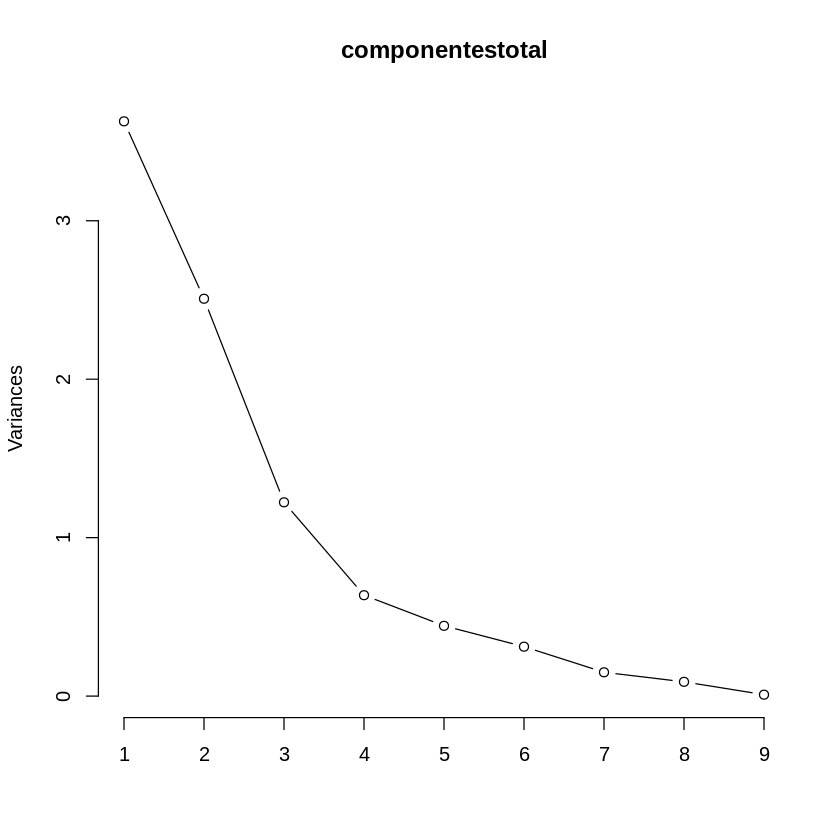

In [49]:
plot(componentestotal, type="l")

In [34]:
library("FactoMineR")
library("factoextra")
library(reshape2)
library(RColorBrewer)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



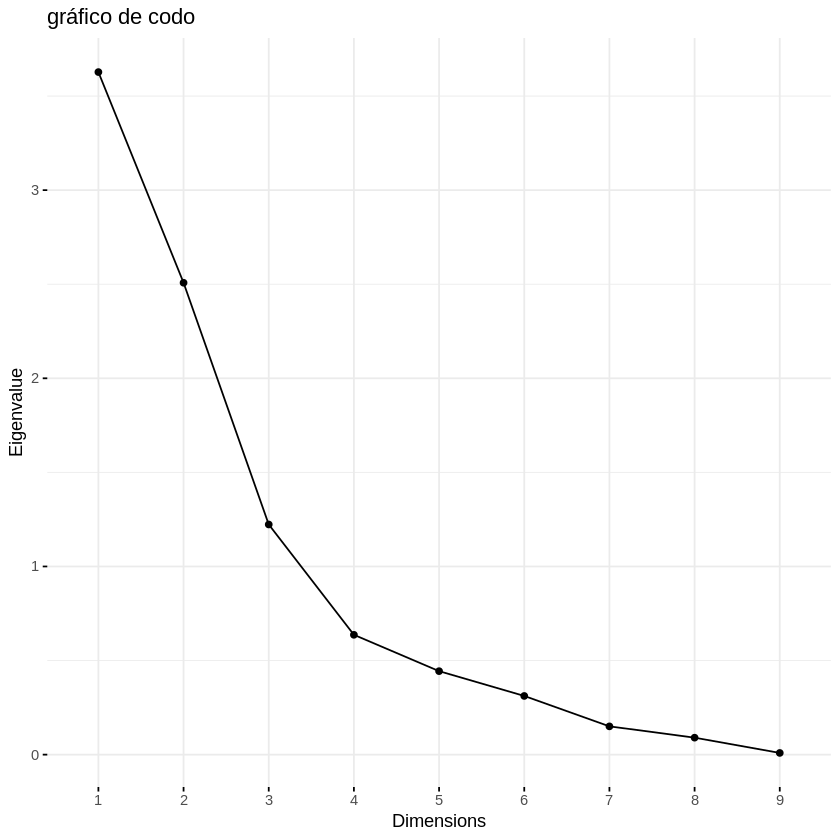

In [56]:
PCAdf<-PCA(df1,ncp=6, graph=FALSE)
#gráfico de codo
fviz_eig(PCAdf,choice="eigenvalue",geom="line", title="gráfico de codo")

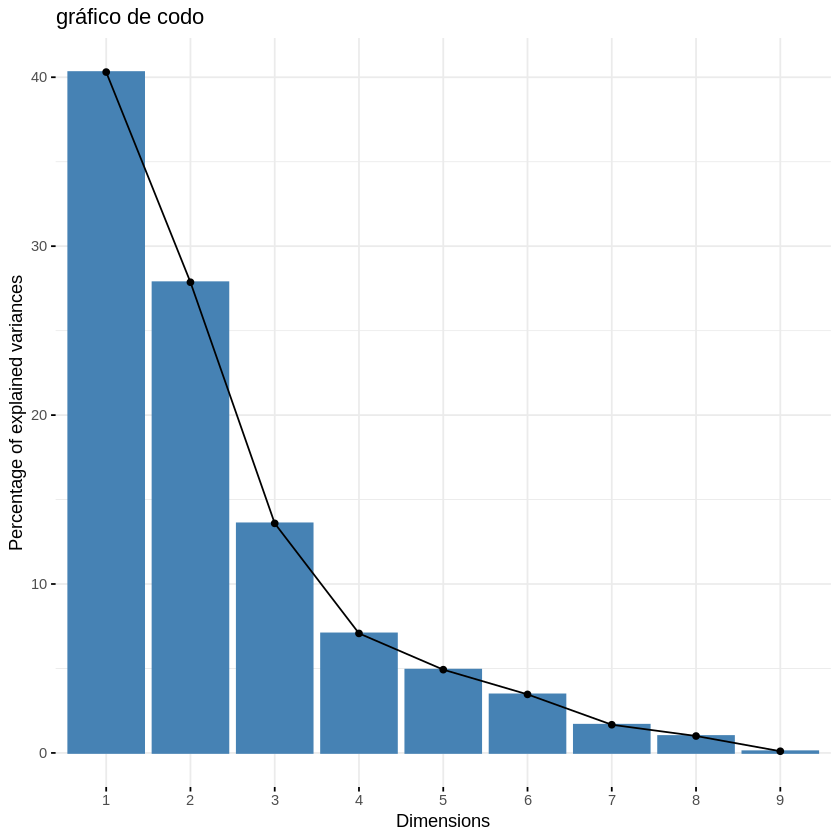

In [58]:
fviz_eig(PCAdf,choice="variance",geom=c("bar","line"), title="gráfico de codo")

In [95]:
componentes<-prcomp(df1, center=TRUE, scale.=TRUE, rank.=3)
print(componentes)

Standard deviations (1, .., p=9):
[1] 1.90458468 1.58359599 1.10594735 0.79798231 0.66604485 0.55844884 0.38759775
[8] 0.30023501 0.09503523

Rotation (n x k) = (9 x 3):
            PC1         PC2         PC3
X1  -0.43713578  0.20420818  0.09610449
X2   0.02197378 -0.50276358  0.46367219
X3  -0.31425514  0.35891801 -0.16401925
X4  -0.20525266 -0.43922106 -0.46451456
X5  -0.38800537 -0.23961597  0.46175681
X6  -0.19710855 -0.39211458 -0.52905465
X7   0.20192507 -0.41119216  0.06876300
X9  -0.46177197 -0.01983331  0.17807483
X10 -0.47343161 -0.05611154 -0.05948749


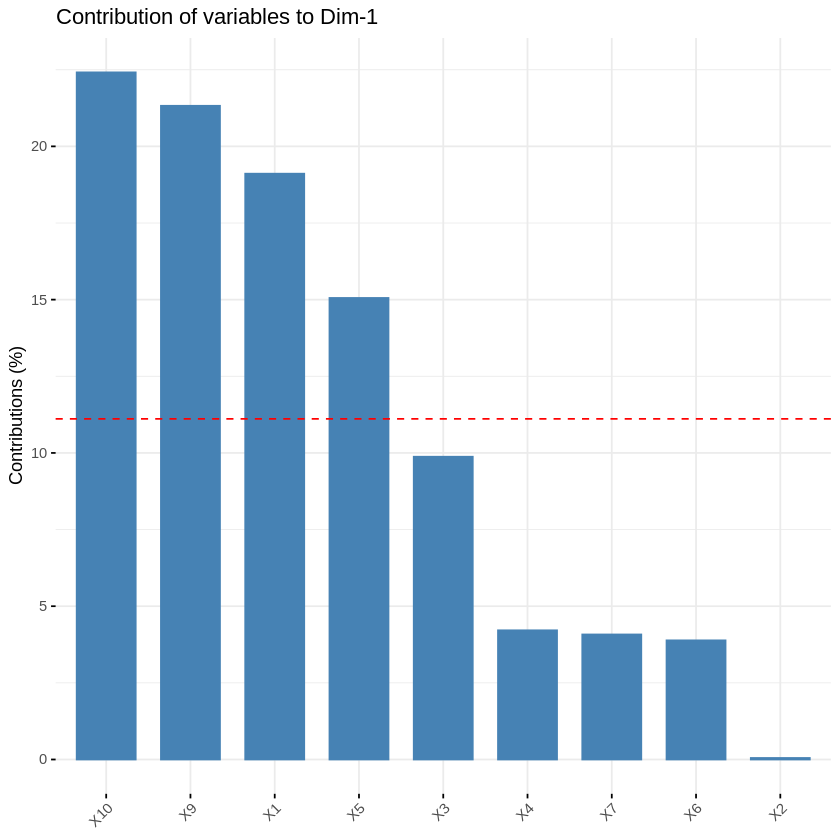

In [59]:
fviz_contrib(PCAdf,choice="var", axes=1)

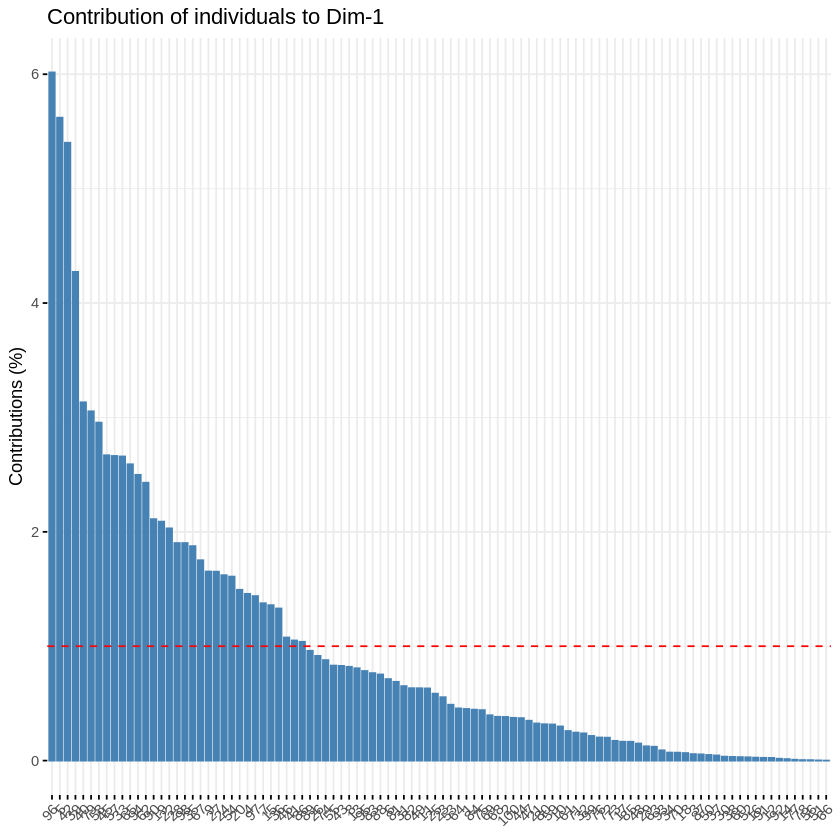

In [60]:
fviz_contrib(PCAdf,choice="ind")


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Using medicion as id variables



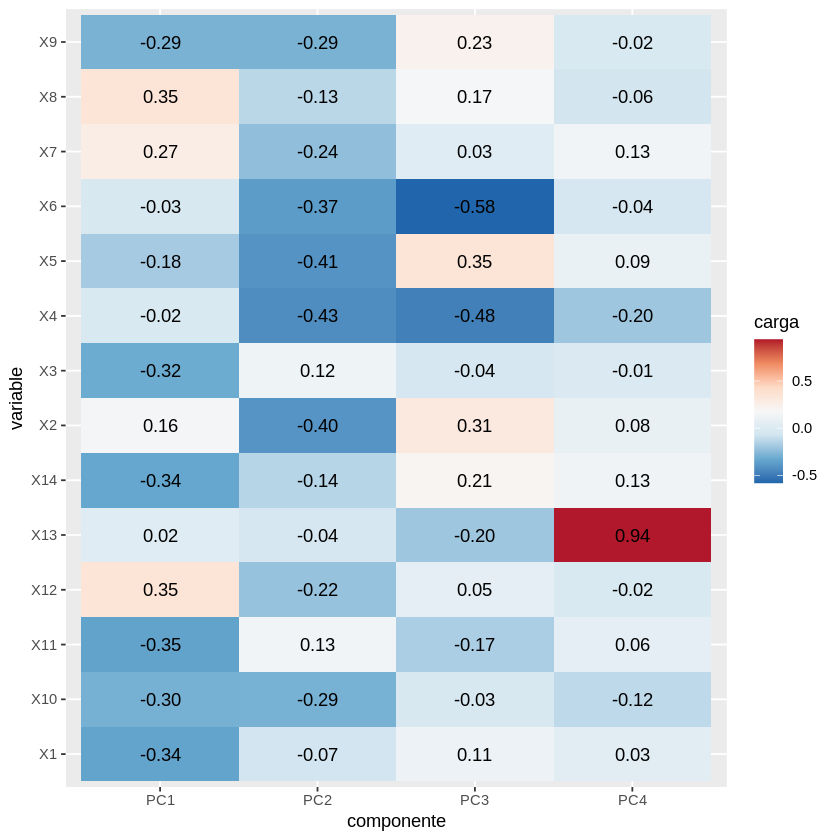

In [18]:
library(reshape2)
library(ggplot2)
cargas<-componentes$rotation
cargasdf<-as.data.frame(cargas)
cargasdf$medicion<-rownames(cargasdf)
cargasheat<-reshape2::melt(cargasdf)
colnames(cargasheat)<-c("variable","componente","carga")
library(ggplot2)
ggplot(cargasheat,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

In [19]:
library(psych)
componentes2<-principal(df1,nfactors=4,rotate="varimax")
# rotaciones disponibles: "none", "varimax", "quatimax", "promax", "oblimin", "simplimax", and "cluster"
componentes2$communality
componentes2$loadings

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”
Warning message in principal(df1, nfactors = 4, rotate = "varimax"):
“The matrix is not positive semi-definite, scores found from Structure loadings”


X1        X2        X3        X4        X5        X6        X7        X8 
0.7557405 0.7843197 0.6579625 0.9133491 0.8853043 0.8873706 0.6341873 0.8381244 
       X9       X10       X11       X12       X13       X14 
0.8290397 0.8138388 0.8381244 0.9082745 0.9790542 0.8300226


Loadings:
    RC1    RC2    RC3    RC4   
X1  -0.592  0.636              
X2   0.781  0.403  0.102       
X3  -0.752  0.300              
X4   0.154  0.189  0.922       
X5   0.109  0.925  0.128       
X6          0.104  0.927  0.122
X7   0.758 -0.103  0.156  0.158
X8   0.872 -0.263              
X9  -0.245  0.863  0.139       
X10 -0.356  0.719  0.399 -0.107
X11 -0.872  0.263              
X12  0.914 -0.236  0.131       
X13                       0.988
X14 -0.473  0.775              

                 RC1   RC2   RC3   RC4
SS loadings    4.907 3.626 1.968 1.054
Proportion Var 0.350 0.259 0.141 0.075
Cumulative Var 0.350 0.609 0.750 0.825

Using medicion as id variables



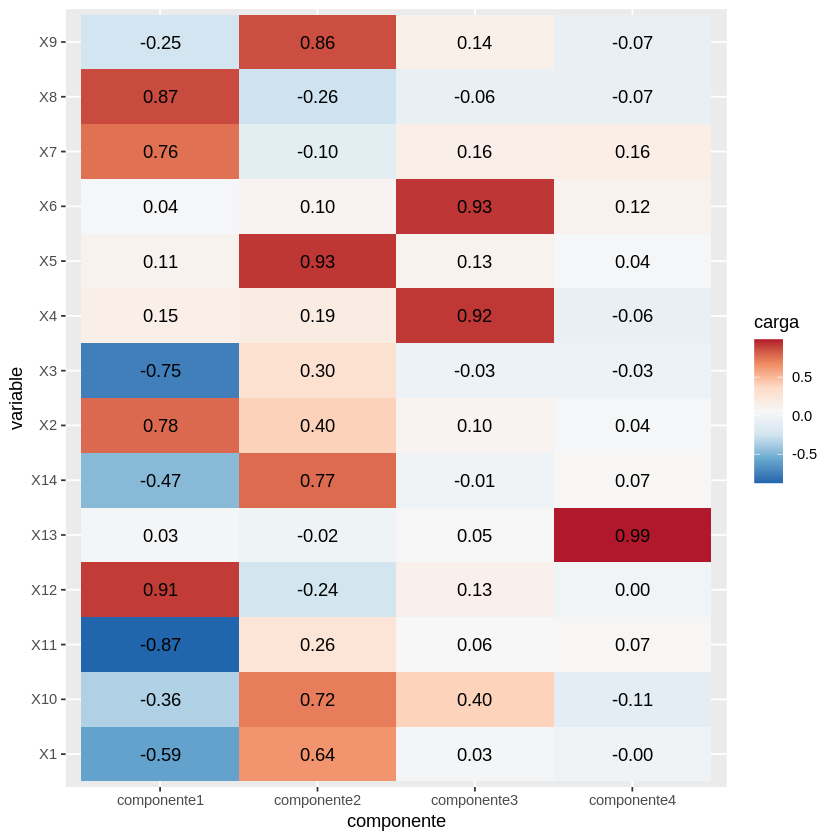

In [21]:
componente1<-componentes2$loadings[,1]
componente2<-componentes2$loadings[,2]
componente3<-componentes2$loadings[,3]
componente4<-componentes2$loadings[,4]

cargasdfr<-as.data.frame(cbind(componente1,componente2,componente3,componente4))
cargasdfr$medicion<-rownames(cargasdfr)
cargasheatr<-reshape2::melt(cargasdfr)
colnames(cargasheatr)<-c("variable","componente","carga")
ggplot(cargasheatr,aes(x=componente,y=variable,fill=carga, label=sprintf("%0.2f", round(carga, digits=2))))+geom_tile()+scale_fill_distiller(palette="RdBu")+geom_text()

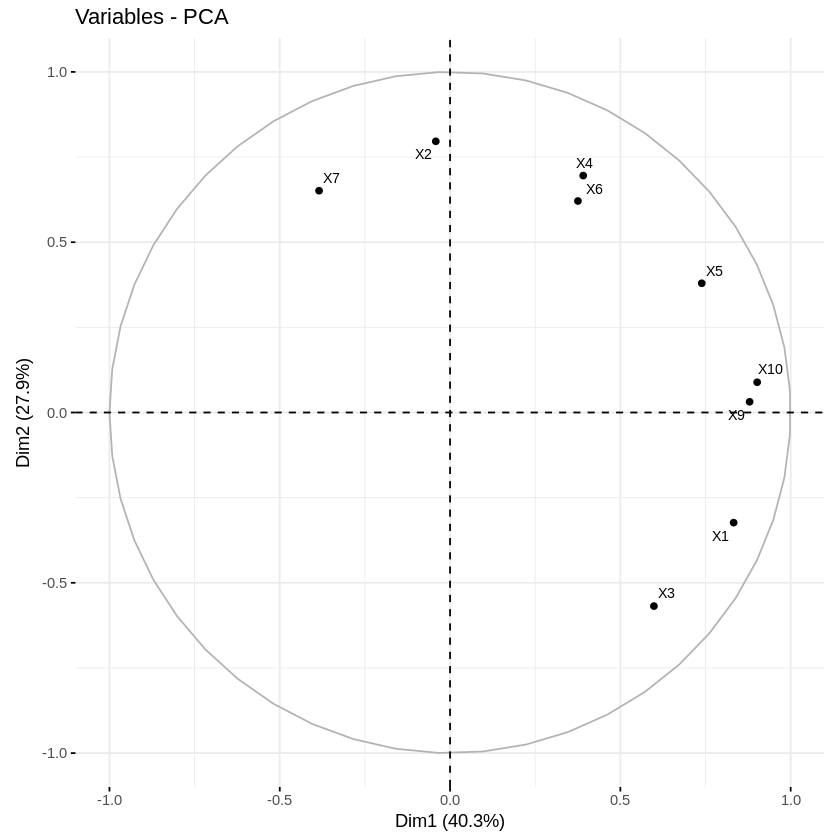

In [61]:
fviz_pca_var(PCAdf, geom =c("point","text"), repel=TRUE, labelsize=3)

Las variables  x10,x9,x1,x3,x5 estan representadas por la dimension 1

Las variables x7,x2,x4,x8,x6 estan representadas por la dimension 2

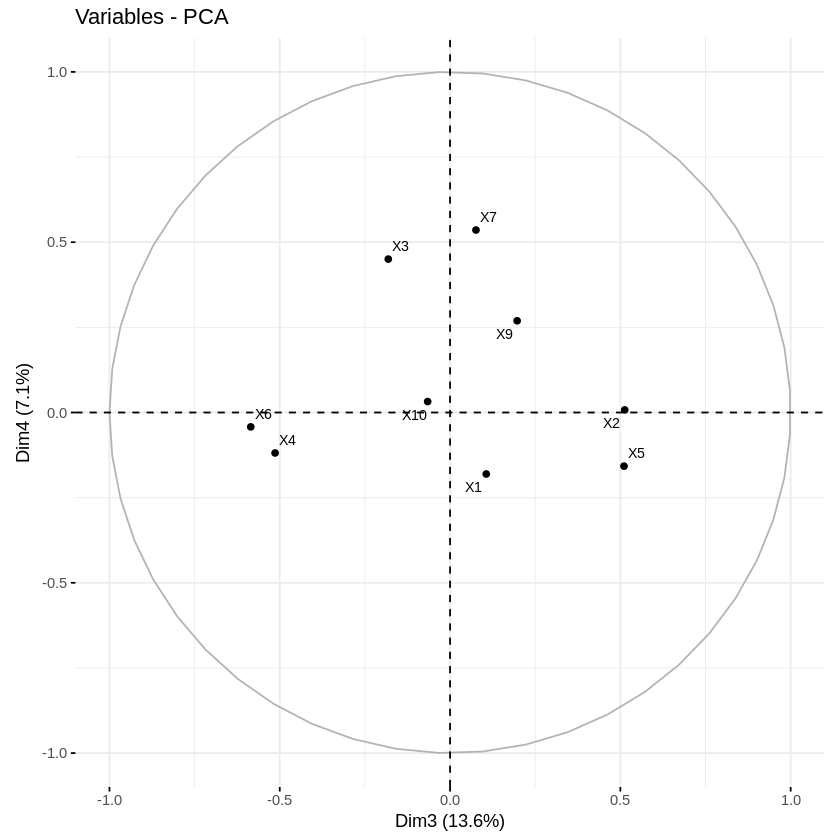

In [62]:
fviz_pca_var(PCAdf,axes=c(3,4), geom =c("point","text"),repel=TRUE, labelsize=3)

La dimension 6 tambien puede caracterizar la variable x6

In [ ]:
# Percepciones (X1 - X7)
# Características del comprador (X8, X11, X12, X13, X14)
# Resultados de compra (X9, X10)

# Supongamos este orden en tu tibble:
# ID, X1-X14


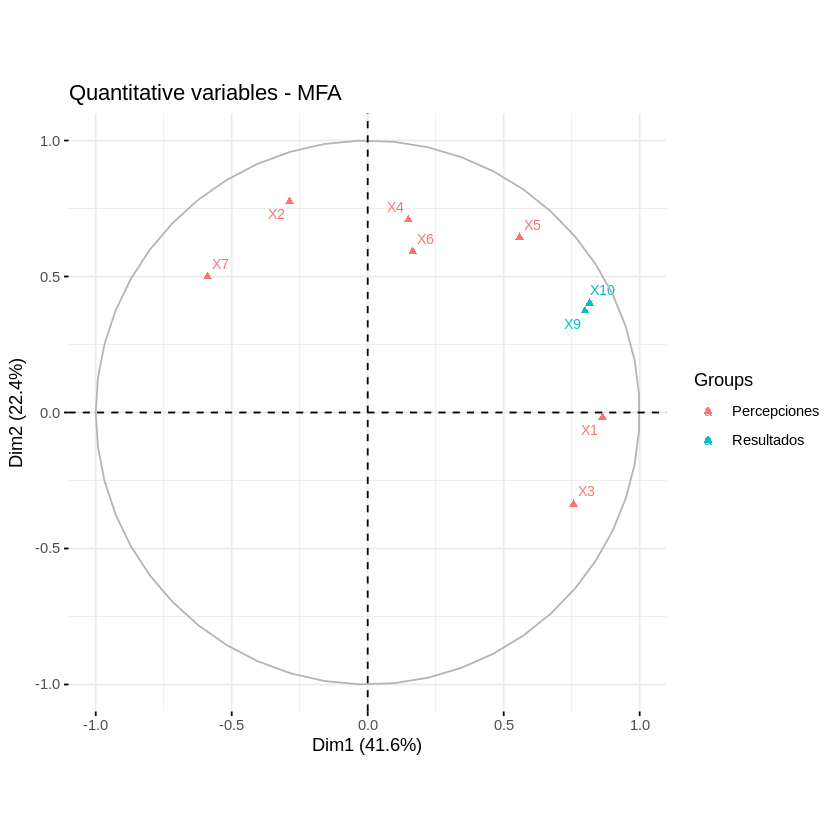

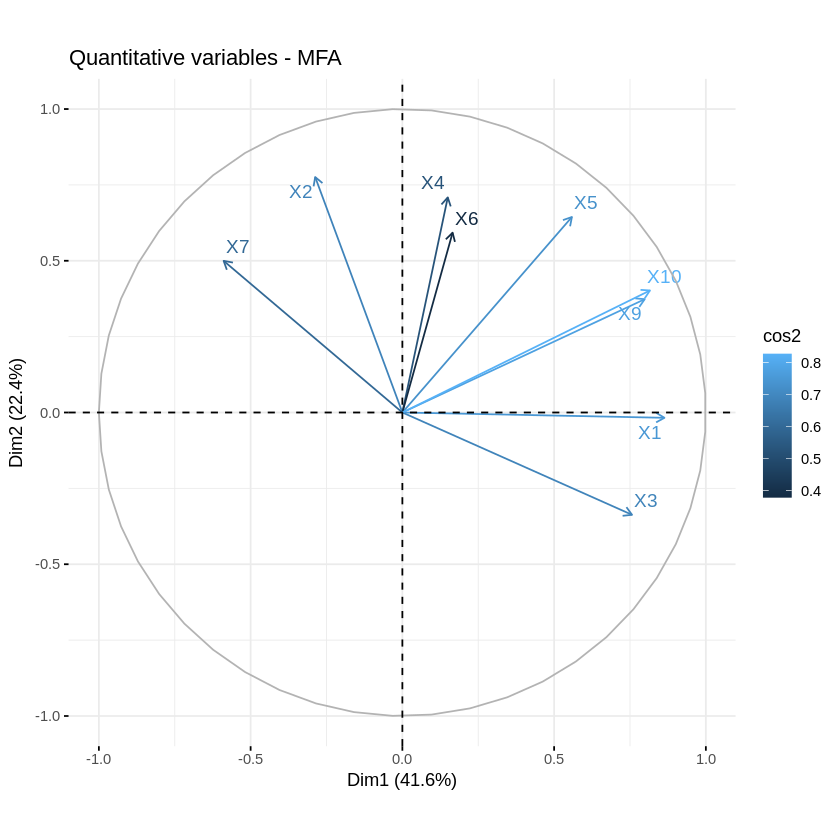

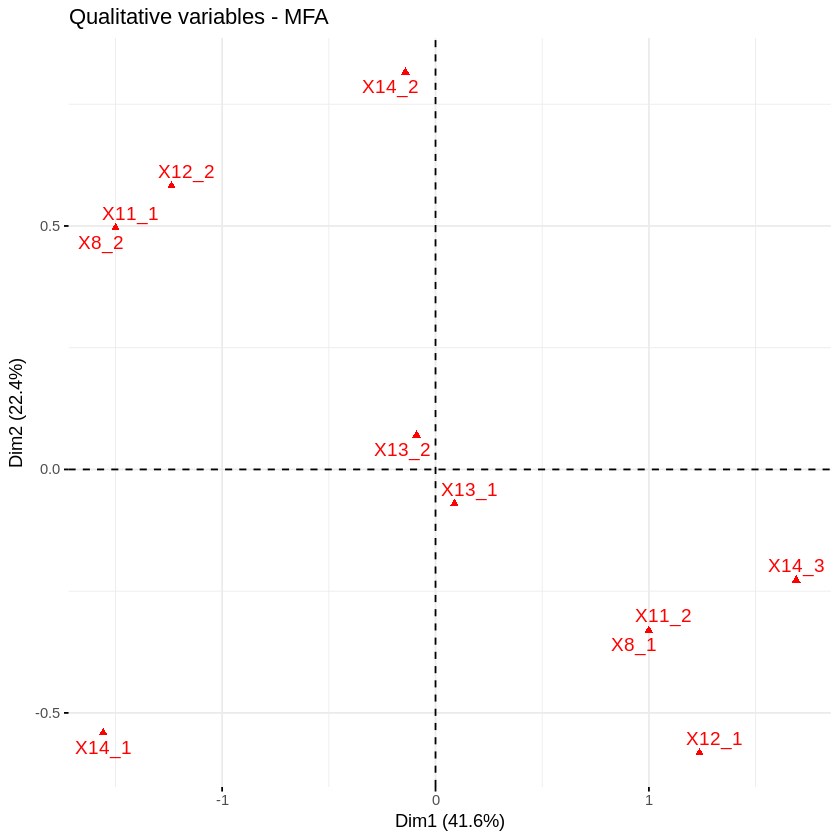

In [92]:
df$X8 <- as.factor(df$X8)  # Confirmamos que es factor
df$X11 <- as.factor(df$X11)
df$X12 <- as.factor(df$X12)
df$X13 <- as.factor(df$X13)
df$X14 <- as.factor(df$X14)

# Reordenamos las columnas agrupando bien:
df_mfa <- df[, c("X1", "X2", "X3", "X4", "X5", "X6", "X7",      # Grupo 1 - Cuantitativas
                 "X9", "X10",                                  # Grupo 2 - Cuantitativas
                 "X8", "X11", "X12", "X13", "X14")]            # Grupo 3 - Cualitativas

# Ejecutar MFA
res_mfa <- MFA(df_mfa,
               group = c(7, 2, 5),                 # 7 cuantitativas, 2 cuantitativas, 5 cualitativas (incluyendo X8)
               type = c("s", "s", "n"),
               name.group = c("Percepciones", "Resultados", "Características"),
               ncp = 5,
               graph = FALSE)

fviz_mfa_var(res_mfa, axes = c(1, 2), geom = c("point", "text"), repel = TRUE, labelsize = 3)


# Visualización de variables cuantitativas
fviz_mfa_var(res_mfa, "quanti.var",
             repel = TRUE,
             col.var = "cos2") +
  ggtitle("Quantitative variables - MFA")

# Visualización de variables cualitativas
fviz_mfa_var(res_mfa, "quali.var",
             repel = TRUE) +
  ggtitle("Qualitative variables - MFA")


Las variables x7,x2,x4,x6,x5 que son variables de persepción las representa la dimensión 2

Las variables x1 y x3 que son variables de persepción las representa la dimension 1

Las variables x10 y x9 que son variables de resultados las representa muy bien la dimension 1

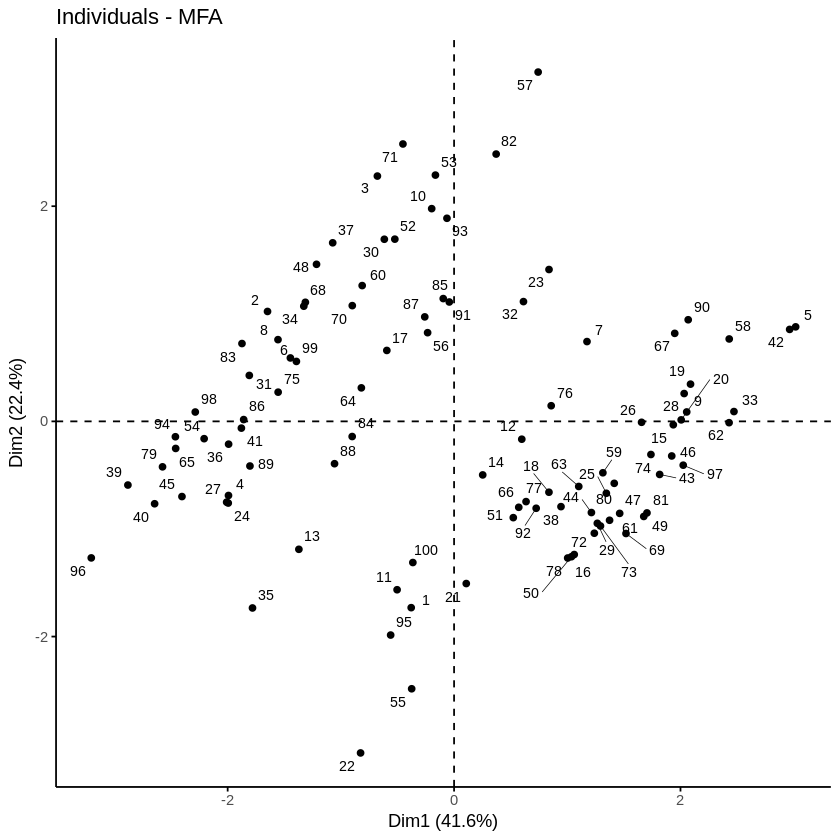

In [98]:
fviz_pca_ind(res_mfa, ggtheme=theme_classic(), repel=TRUE, labelsize=3)